# Notebook to produce some nice graphs

This version: Numbers are for a baseline calibration where the parameter `IncUnempNoBenefits = 0.15`

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import pandas as pd

plt.style.use('classic')

## Numbers from the data 

In [2]:
# From the data: 
data_LorenzPts = np.array([[0, 0.01, 0.60, 3.58], [0.06, 0.63, 2.98, 11.6], [0.15, 0.92, 3.27, 10.3], 
                           [0.03, 0.35, 1.84, 7.42]])

data_LP_popln = pd.read_csv('LorenzAll.csv', sep='\t')
data_LP_byEd = pd.read_csv('LorenzEd.csv', sep='\t')

In [3]:
myDf = data_LP_byEd[data_LP_byEd['myEd']==3]

myDf = myDf[myDf['sumEdW'] > 79.9]

print(myDf)

       yy1  myEd     sumEdW     sumLW
2042   879     3   79.90005  10.28338
2043  1636     3   79.90484  10.28666
2044  3361     3   80.04536  10.38341
2045  1194     3   80.05186  10.38789
2046  2766     3   80.08371  10.41020
...    ...   ...        ...       ...
2716   813     3   99.99979  99.85492
2717  3576     3   99.99983  99.88373
2718  1635     3   99.99990  99.92633
2719  4158     3   99.99994  99.95766
2720  2748     3  100.00000  99.99999

[679 rows x 4 columns]


# Numbers from the model

In [4]:
# From the estimated model: 
model_LorenzPts = np.array([ [0.0, 0.0, 0.51344933, 3.59182341], [0.03871055, 0.95290877, 3.73518817, 11.30585094],
                            [0.31563641, 1.47574711, 3.98764309, 9.86154603], [0.03767855, 0.63177935, 2.61817587, 8.52690454]])

# Figure labels

In [5]:
# Figure labels:
mylabels = ['No highschool', 'Highschool', 'College', 'Population (not targeted)']
myYticksOld = [[0,1,2,3,4], [0,3,6,9,12],[0,3,6,9,12],[0,2,4,6,8]]
myYticks = [range(0,12,2), range(0,30,5),range(0,30,5),range(0,20,4)]

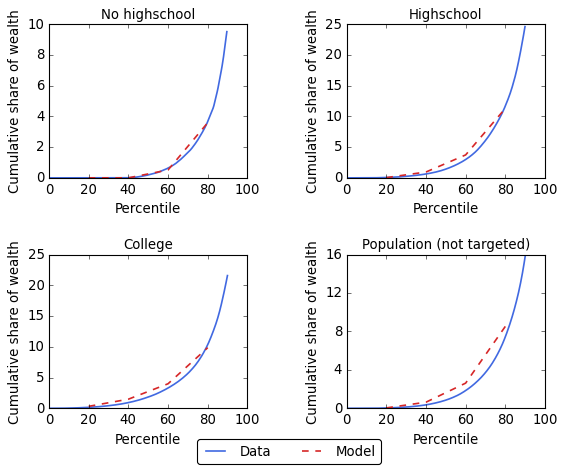

In [6]:
x_axis = np.array([20,40,60,80])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=.5, wspace=.5)
axs = gs.subplots(sharex=False, sharey=False)

for row in range(2):
    for col in range(2):
        idx = col+row*(row+1)+1
        if idx < 4:
            dfToPlot = data_LP_byEd[data_LP_byEd['myEd']==idx]
            dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 90]
            axs[row,col].plot(dfToPlot['sumEdW'],dfToPlot['sumLW'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        else:
            dfToPlot = data_LP_popln[data_LP_popln['sumNormW'] <= 90]
            axs[row,col].plot(dfToPlot['sumNormW'],dfToPlot['sumLWall'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        axs[row,col].plot(x_axis, model_LorenzPts[col+row*(row+1)], color="tab:red", 
                          linestyle='dashed', linewidth=1.5,label='Model')
        axs[row,col].set_xticks(ticks=[0,20,40,60,80,100])
        axs[row,col].set_yticks(ticks=myYticks[col+row*(row+1)])
        axs[row,col].set_title(mylabels[col+row*(row+1)])
        axs[row,col].title.set_fontsize(12)
        
        if idx == 4:
            handles, labels = axs[row,col].get_legend_handles_labels()

for ax in axs.flat:
    ax.set(xlabel='Percentile', ylabel='Cumulative share of wealth')
    #ax.label_outer()
plt.rc('axes', labelsize=12)

lgd = fig.legend(handles, labels, loc='lower center', ncol=2, fancybox=True, shadow=False, 
          bbox_to_anchor=(0.5, -0.03), fontsize=12)
fig.set_facecolor(color="white")

plt.show()

In [7]:
# Save fig for paper
fig.savefig('LorenzPoints.pdf', facecolor=fig.get_facecolor(), edgecolor='none',
            bbox_extra_artists=(lgd,), bbox_inches='tight')

# Numbers from robustness exercises

In [9]:
model_LorenzPts_g2p0 = np.array([[0.0, 0.0, 0.40799167, 3.60272493], [0.06747572, 1.01918286, 3.77279962, 11.27410446], 
                            [0.34892995, 1.52538628, 4.02132589, 9.83078857], [0.0473006, 0.65724509, 2.64021728, 8.51201721]])
model_LorenzPts_g3p0 = np.array([[0.0, 0.0, 3.71681246, 18.56560286], [0.07568079, 1.01021731, 3.73482387, 11.30260385], 
                            [0.39175979, 1.59465574, 4.07550591, 9.79094967], [0.05213438, 0.63909007, 2.54326761, 8.17269142]])


# Figure labels - robustness graph

In [13]:
# Figure labels:
mylabels = ['No highschool (9.3 pct)', 'Highschool (52.7 pct)', 'College (38 pct)', 'Population']
myYticks = [range(0,30,5), range(0,30,5),range(0,30,5),range(0,30,5)]

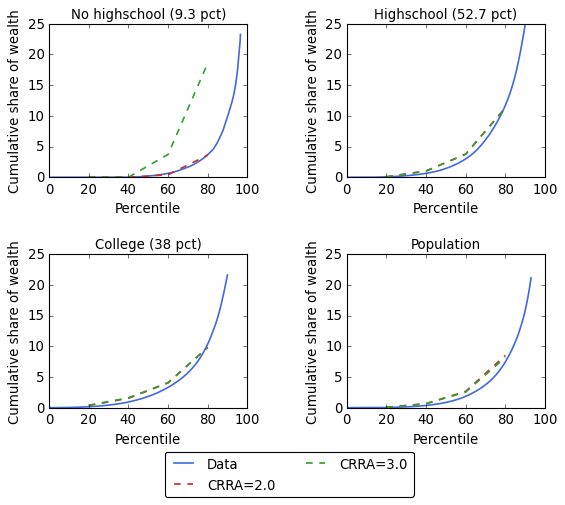

In [20]:
x_axis = np.array([20,40,60,80])

fig = plt.figure()
gs = fig.add_gridspec(2, 2, hspace=.5, wspace=.5)
axs = gs.subplots(sharex=False, sharey=False)

for row in range(2):
    for col in range(2):
        idx = col+row*(row+1)+1
        if idx < 4:
            dfToPlot = data_LP_byEd[data_LP_byEd['myEd']==idx]
            if idx == 1:
                dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 96.5]
            else:
                dfToPlot = dfToPlot[dfToPlot['sumEdW'] <= 90]    
            axs[row,col].plot(dfToPlot['sumEdW'],dfToPlot['sumLW'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        else:
            dfToPlot = data_LP_popln[data_LP_popln['sumNormW'] <= 93]
            axs[row,col].plot(dfToPlot['sumNormW'],dfToPlot['sumLWall'], color="royalblue",
                              linestyle='solid', linewidth=1.5, label='Data')
        #axs[row,col].plot(x_axis, model_LorenzPts_g1p5[col+row*(row+1)], color="tab:purple", 
        #                  linestyle='dashed', linewidth=1.5,label='CRRA=1.5')
        axs[row,col].plot(x_axis, model_LorenzPts_g2p0[col+row*(row+1)], color="tab:red", 
                          linestyle='dashed', linewidth=1.5,label='CRRA=2.0')
        axs[row,col].plot(x_axis, model_LorenzPts_g3p0[col+row*(row+1)], color="tab:green", 
                          linestyle='dashed', linewidth=1.5,label='CRRA=3.0')
        axs[row,col].set_xticks(ticks=[0,20,40,60,80,100])
        axs[row,col].set_yticks(ticks=myYticks[col+row*(row+1)])
        axs[row,col].set_title(mylabels[col+row*(row+1)])
        axs[row,col].title.set_fontsize(12)
        
        if idx == 4:
            handles, labels = axs[row,col].get_legend_handles_labels()

for ax in axs.flat:
    ax.set(xlabel='Percentile', ylabel='Cumulative share of wealth')
    #ax.label_outer()
plt.rc('axes', labelsize=12)

lgd = fig.legend(handles, labels, loc='lower center', ncol=2, fancybox=True, shadow=False, 
          bbox_to_anchor=(0.5, -0.10), fontsize=12)
fig.set_facecolor(color="white")

plt.show()

In [21]:
# Save robustness fig
fig.savefig('LorenzPoints_robustness.pdf', facecolor=fig.get_facecolor(), edgecolor='none',
            bbox_extra_artists=(lgd,), bbox_inches='tight')